In [127]:
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import scipy.constants as cs
from scipy.special import wofz
from uncertainties import ufloat

In [128]:
# %pip install seaborn

In [129]:
# Alex's scientific paper style
import matplotlib.pyplot as plt
import numpy as np
import os
from os.path import exists
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.patches import FancyArrowPatch
import statistics 
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import math
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import pandas as pd

plt.rcParams['text.usetex'] = True

colorList = ['dodgerblue', 'crimson', 'forestgreen', 'darkorange', 'dimgrey', 'purple', 'orchid']
DBlue = [x/256 for x in (4,87,172)]
LB = [x/256 for x in (48,143,172)]
BGreen = [x/256 for x in (55,189,121)]
LG = [x/256 for x in (167,226,55)]
Yellow = [x/256 for x in (244,230,4)]
colorList2 = [DBlue, LB, BGreen, LG, Yellow]

def floatToTex(x):
    return "$"+str(x)+"$"

Fit the peaks from the hydrogen and deuterium lines, and determine the
line centers. From these numbers, you should be able to calculate the ratio of the electron mass
to the nucleon mass.

## Balmer Formula:
$$
\frac{1}{\lambda_n} = R_\infty \left( \frac{1}{2^2} - \frac{1}{n^2} \right)
$$
For our case trying to distinguish between Hydrogen and Deuterium:
$$
\lambda_n^H = \left( 1 + \frac{m_e}{M_P} \right) \lambda_n
$$
$$
\lambda_n^D = \left( 1 + \frac{m_e}{M_D} \right) \lambda_n
$$
We make the reasonable approximation $M_D = 2 M_P$, which introduces a relative error of $5\times 10^{-4}$




## Balmer Series Wavelengths
#### Alpha Line:
$$
\frac{1}{\lambda_3} = R_\infty \left( \frac{1}{2^2} - \frac{1}{3^2} \right) \Rightarrow \lambda_3 = 656.11 \,\text{nm}
$$

$$
\lambda_n^H = \left( 1 + \frac{1}{1836} \right) \lambda_3 \rightarrow \lambda_3^H \approx 656.47 \,\text{nm}
$$

$$
\lambda_3^D = \left( 1 + \frac{1}{2 \cdot 1836} \right) \lambda_3 \approx 656.29 \,\text{nm}
$$

n = 3 corresponds to visible red light!

#### Beta Line:

$$
\frac{1}{\lambda_4} = R_\infty \left( \frac{1}{2^2} - \frac{1}{4^2} \right) \rightarrow \lambda_4 = 486.01 \,\text{nm}
$$

$$
\lambda_4^H = \left( 1 + \frac{1}{1836} \right) \lambda_4 \rightarrow \lambda_4^H \approx 486.27 \,\text{nm}
$$

$$
\lambda_4^D = \left( 1 + \frac{1}{2 \cdot 1836} \right) \lambda_4 \approx 486.14 \,\text{nm}
$$

n = 4 corresponds to visible blue light!

#### Gamma Line:

$$
\frac{1}{\lambda_5} = R_\infty \left( \frac{1}{2^2} - \frac{1}{5^2} \right) \rightarrow \lambda_5 = 433.94 \,\text{nm}
$$

$$
\lambda_5^H = \left( 1 + \frac{1}{1836} \right) \lambda_5 \rightarrow \lambda_5^H \approx 434.17 \,\text{nm}
$$

$$
\lambda_5^D = \left( 1 + \frac{1}{2 \cdot 1836} \right) \lambda_5 \approx 434.05 \,\text{nm}
$$

n = 5 corresponds to visible violet light!

#### Delta Line:

$$
\frac{1}{\lambda_6} = R_\infty \left( \frac{1}{2^2} - \frac{1}{6^2} \right) \rightarrow \lambda_6 = 410.07 \,\text{nm}
$$

$$
\lambda_6^H = \left( 1 + \frac{1}{1836} \right) \lambda_6 \rightarrow \lambda_6^H \approx 410.29 \,\text{nm}
$$

$$
\lambda_6^D = \left( 1 + \frac{1}{2 \cdot 1836} \right) \lambda_6 \approx 410.18 \,\text{nm}
$$

n = 6 corresponds to visible violet light!


## Load and present data: Alpha lines for hydrogen and deuterium

In [130]:
def load_and_process_data(filename, start_step, step_size):
    wavelength_index, voltage = np.loadtxt(filename, skiprows=1, unpack=True)
    print(f"there are {len(wavelength_index)} data points in {filename}")
    spectrometer_value = start_step + (wavelength_index * step_size)
    wavelength = spectrometer_value / 20
    return wavelength, voltage

def plot_data(wavelength, voltage, title="", color_idx=0, peak_wavelengths=None):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(wavelength, voltage, marker='o', linestyle='-', color=colorList2[color_idx], alpha=0.7)
    ax.set_ylabel(r'Voltage [V]', fontsize=22, fontweight='bold')
    ax.set_xlabel(r'Wavelength $\lambda$ [nm]', fontsize=22, fontweight='bold')
    ax.set_title(f"Data for the Hydrogen and Deuterium Balmer Lines ({title})", fontsize=24, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    ax.grid(True, linestyle='--', linewidth=1)
    
    if peak_wavelengths:
        for peak in peak_wavelengths:
            ax.axvline(peak, color='black', linestyle='--', linewidth=2, label=f'Peak: {peak:.2f} nm')
    
    plt.legend()
    plt.show()

In [131]:
## Alpha lines for Hydrogen and Deuterium (Earlier data)
# filename_alpha = 'ALPHA_HD.txt' 
# start_step_alpha = 13100
# step_size_alpha = 0.1
# wavelength_alpha, voltage_alpha = load_and_process_data(filename_alpha, start_step_alpha, step_size_alpha)
# plot_data(wavelength_alpha, voltage_alpha, title="Calibration", color_idx=0)

there are 326 data points in day3_alphaHD.txt


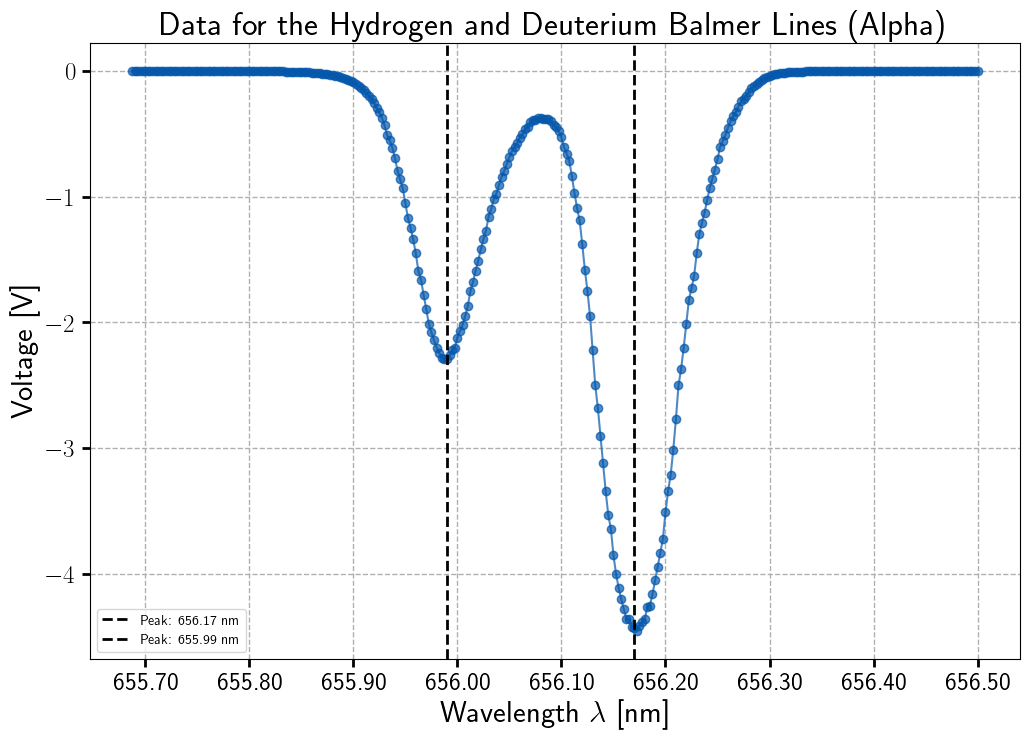

In [132]:
## Alpha lines for Hydrogen and Deuterium
# Voltage to PMT = 500V, sampling truncated early in experiment
filename_alpha = 'day3_alphaHD.txt'
start_step_alpha = 13130
step_size_alpha = -0.05
wavelength_alpha, voltage_alpha = load_and_process_data(filename_alpha, start_step_alpha, step_size_alpha)
offset_alpha = -0.3
alpha_peaks = [656.47+offset_alpha, 656.29+offset_alpha]
plot_data(wavelength_alpha, voltage_alpha, title="Alpha", color_idx=0, peak_wavelengths=alpha_peaks)

there are 203 data points in day3_betaHD.txt


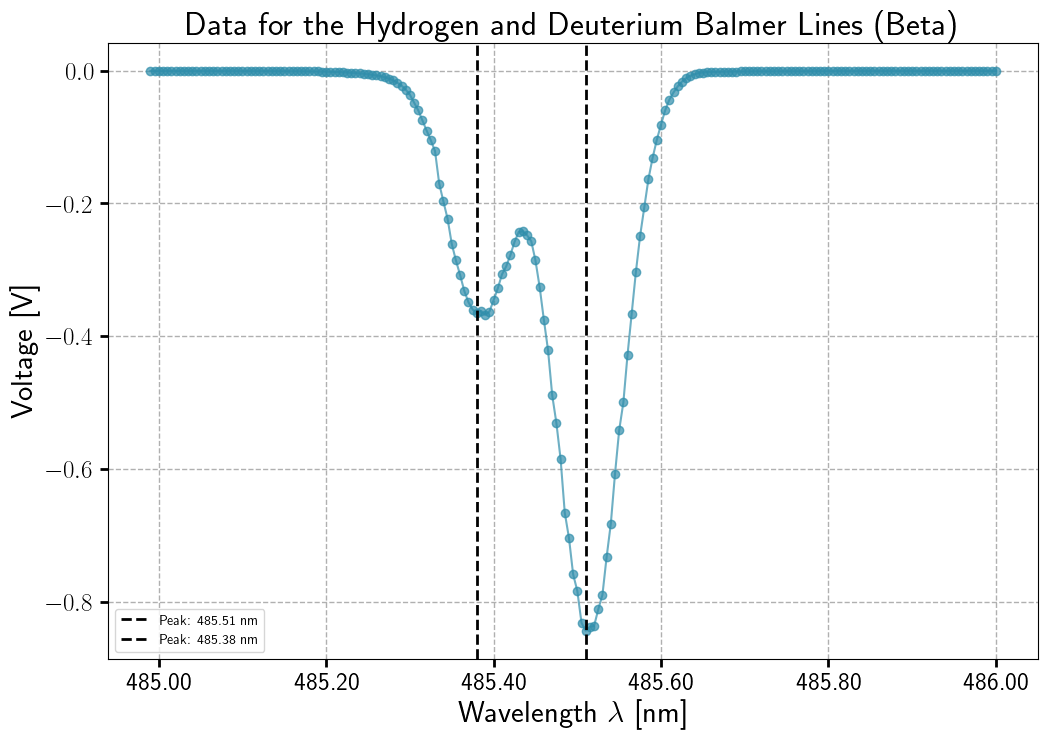

In [133]:
## Beta lines for Hydrogen and Deuterium
# Voltage to PMT = 500V
filename_beta = 'day3_betaHD.txt'
start_step_beta = 9720
step_size_beta = -0.1
wavelength_beta, voltage_beta = load_and_process_data(filename_beta, start_step_beta, step_size_beta)
offset_beta = -0.76
beta_peaks = [486.27+offset_beta, 486.14+offset_beta]
plot_data(wavelength_beta, voltage_beta, title="Beta", color_idx=1, peak_wavelengths=beta_peaks)

there are 103 data points in day3_gammaHD.txt


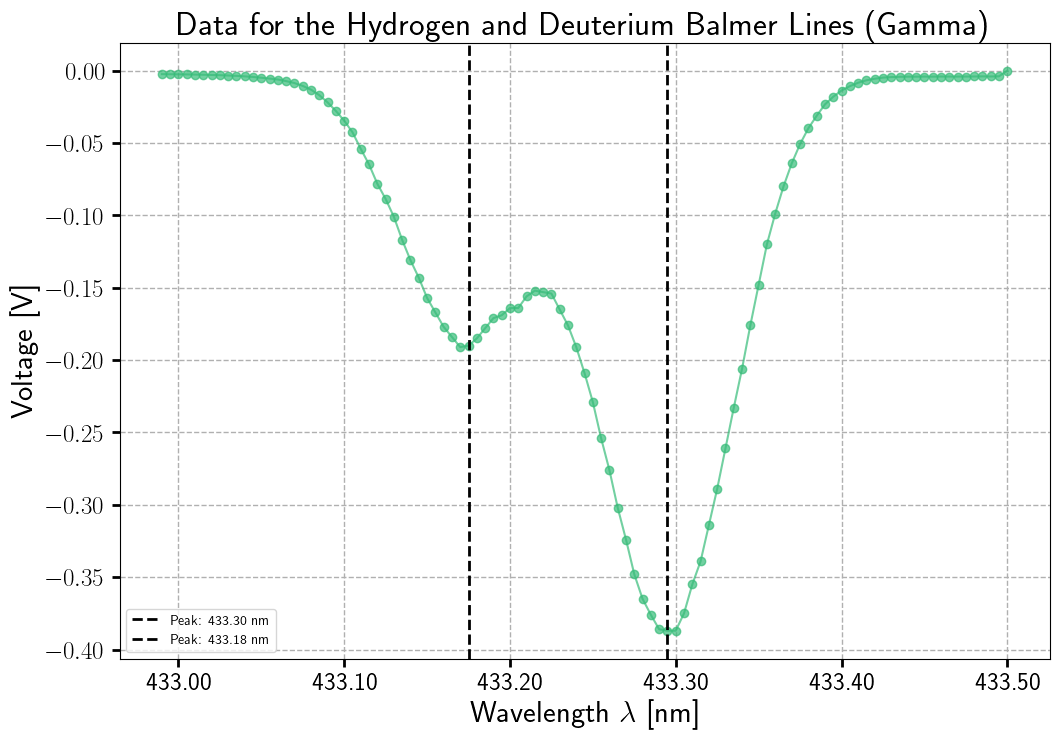

In [134]:
## Gamma lines for Hydrogen and Deuterium
# Voltage to PMT = 600V
filename_gamma = 'day3_gammaHD.txt'
start_step_gamma = 8670
step_size_gamma = -0.1
wavelength_gamma, voltage_gamma = load_and_process_data(filename_gamma, start_step_gamma, step_size_gamma)
offset_gamma = -0.875
gamma_peaks = [434.17+offset_gamma, 434.05+offset_gamma]
plot_data(wavelength_gamma, voltage_gamma, title="Gamma", color_idx=2, peak_wavelengths=gamma_peaks)


Yay we have the data! The next step is to properly label the axes. The y-axis is in volts while the x-axis was in whatever units that the instrument was in, but we want to convert it into wavelength. 

In our data collection we had started from 13100 to 13130 in increments of 0.10. In order to convert into nanometers, we would be dividing these values by 20. 

## Calculating the electron to proton mass ratio
$
    \Delta \lambda_n = \lambda_n^H - \lambda_n^D = \lambda_n m_e \left( \frac{1}{M_P} - \frac{1}{M_D} \right) = \lambda_n \frac{m_e}{M_P} \left( 1 - \frac{M_P}{M_D} \right)
$
<br>
$\frac{m_e}{M_P} \approx \frac{\Delta \lambda_n}{\lambda_n} \cdot \frac{1}{1 - \frac{M_P}{M_D}} = \frac{\lambda_H- \lambda_D}{\lambda_n} \cdot \frac{1}{1 - \frac{M_P}{M_D}} $
where 
$
\frac{M_P}{M_D} \approx \frac{1}{2} + 2.5 \cdot 10^{-4}
$

In [135]:
def calculate_electron_proton_mass_ratio_old(lambdaD, lambdaH):
    mpmd_ratio = 0.5 + 2.5*10**(-4)
    return abs(lambdaH-lambdaD)/lambdaH*1/(1-mpmd_ratio)
def calculate_electron_proton_mass_ratio(lambdaD, lambdaH, n=3):
    rdydberg = ufloat(10973731.568508, 0.000021)
    mpmd_ratio = 0.5 + 2.5*10**(-4)
    lambda_n = 1/(rdydberg*(1/(2**2)-1/(n**2))) * 1e9  # Convert to nm
    return (lambdaH-lambdaD)/lambda_n*1/(1-mpmd_ratio)

## Peak Fitting
We use scipy curve fit and the uncertainties library to fit our data and calcukate ucnertainties

In [136]:
def fit_double_peak(wavelength, voltage, fit_function, initial_guess, lambda1_idx=1, lambda2_idx=4):
    params, covariance = curve_fit(fit_function, wavelength, voltage, p0=initial_guess)
    uncertainties = np.sqrt(np.diag(covariance))
    
    fitted_values = fit_function(wavelength, *params)
    residuals = voltage - fitted_values
    
    param_with_uncertainties = [ufloat(param, unc) for param, unc in zip(params, uncertainties)]
    mass_ratio_old = calculate_electron_proton_mass_ratio_old(param_with_uncertainties[lambda1_idx], param_with_uncertainties[lambda2_idx])
    mass_ratio = calculate_electron_proton_mass_ratio(param_with_uncertainties[lambda1_idx], param_with_uncertainties[lambda2_idx])
    print(f"Mass ratio old: {mass_ratio_old}")
    print(f"Mass ratio: {mass_ratio}")
    
    return params, uncertainties, fitted_values, residuals, mass_ratio, param_with_uncertainties

def plot_double_peak_fit(wavelength, voltage, fit_function, params, residuals, 
                        mass_ratio, param_with_uncertainties, title, fit_title, color_idx=0, show_residuals=True):
    if show_residuals:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), height_ratios=[3, 1])
    else:
        fig, ax1 = plt.subplots(figsize=(12, 6))
    
    ax1.scatter(wavelength, voltage, color=colorList2[color_idx], alpha=0.7, 
                label='Data', s=30)
    
    fitted_curve = fit_function(wavelength, *params)
    ax1.plot(wavelength, fitted_curve, color="black", 
             label=f'{fit_title} Fit', linewidth=2)
    
    ax1.set_xlabel(r'Wavelength $\lambda$ [nm]', fontsize=22, fontweight='bold')
    ax1.set_ylabel(r'Voltage [V]', fontsize=22, fontweight='bold')
    ax1.set_title(f"Double {fit_title} Peak Fit for {title}", fontsize=24, fontweight='bold', pad=20)
    
    param_text = [
        f'$A_1 = {param_with_uncertainties[0]:S} \\, \\mathrm{{V}}$',
        f'$\\mu_1 = {param_with_uncertainties[1]:S} \\, \\mathrm{{nm}}$',
        f'$\\sigma_1 = {param_with_uncertainties[2]:S} \\, \\mathrm{{nm}}$',
        f'$A_2 = {param_with_uncertainties[3]:S} \\, \\mathrm{{V}}$',
        f'$\\mu_2 = {param_with_uncertainties[4]:S} \\, \\mathrm{{nm}}$',
        f'$\\sigma_2 = {param_with_uncertainties[5]:S} \\, \\mathrm{{nm}}$',
        f'$m_e/m_p = {mass_ratio:S}$',
        f'(Expected: ${1/1836:.6f}$)'
    ]
    
    for text in param_text:
        ax1.plot([], [], ' ', label=text)
    
    ax1.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax1.grid(True, linestyle='--', alpha=0.5)
    ax1.legend(fontsize=14, frameon=True, fancybox=True, framealpha=0.9)
    
    if show_residuals:
        ax2.scatter(wavelength, residuals, color=colorList2[color_idx], 
                   alpha=0.7, s=30, label='Residuals')
        ax2.axhline(0, color='black', linestyle='--', linewidth=1)
        
        ax2.set_xlabel(r'Wavelength $\lambda$ [nm]', fontsize=22, fontweight='bold')
        ax2.set_ylabel(r'Residuals [V]', fontsize=22, fontweight='bold')
        ax2.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
        ax2.grid(True, linestyle='--', alpha=0.5)
        ax2.legend(fontsize=14, frameon=True, fancybox=True, framealpha=0.9)
    
    plt.tight_layout()
    return fig, ax1, ax2 if show_residuals else ax1

### Double Gaussian

If this were a perfect world, we would expect to see 2 dirac delta functions (or actually 7). But of course the world is not perfect. Thus, our best way to go is to first try to fit 2 Gaussians to find the 2 peak wavelengths of the Hydrogenn and Deuterium alpha lines. 

$$
f(\lambda) = A_1 e^{-\frac{(\lambda - \mu_1)^2}{2\sigma_1^2}} + A_2 e^{-\frac{(\lambda - \mu_2)^2}{2\sigma_2^2}}
$$

Mass ratio old: 0.0005553+/-0.0000011
Mass ratio: 0.0005553+/-0.0000011


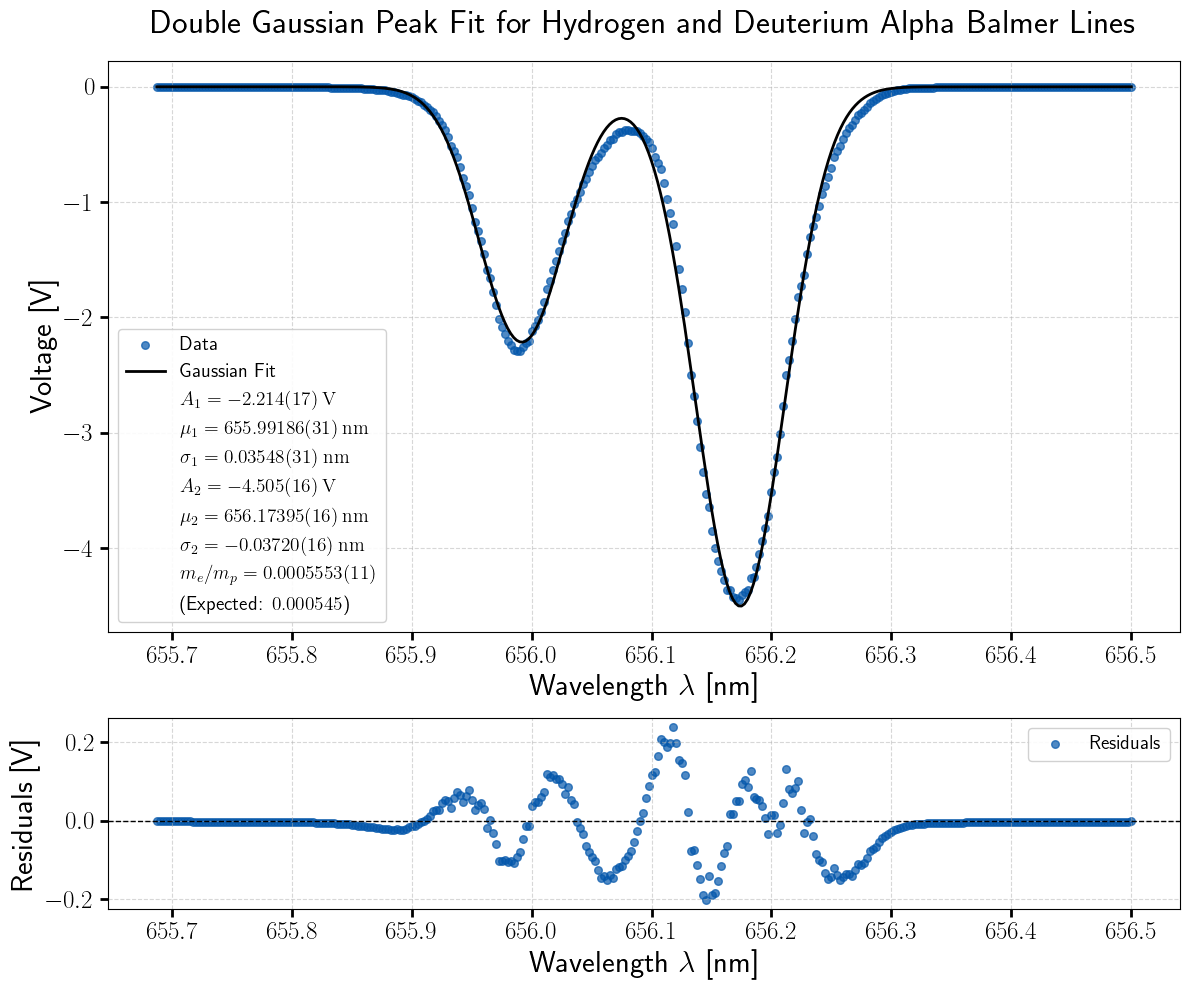

In [137]:
def double_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return A1 * np.exp(-((x - mu1)**2) / (2 * sigma1**2)) + A2 * np.exp(-((x - mu2)**2) / (2 * sigma2**2))

initial_guess_alpha = [-0.1, 655.4, 0.5, -0.3, 655.6, 0.1]
params, uncertainties, fitted_values, residuals, mass_ratio, param_with_uncertainties = fit_double_peak(
    wavelength_alpha, voltage_alpha, double_gaussian, initial_guess_alpha
)

fig, ax1, ax2 = plot_double_peak_fit(
    wavelength_alpha, voltage_alpha, double_gaussian, 
    params, residuals, mass_ratio, param_with_uncertainties,
    title="Hydrogen and Deuterium Alpha Balmer Lines",
    fit_title="Gaussian",
    color_idx=0, show_residuals=True
)
plt.show()

### Double Lorentzian
The Lorentz distribution function is given by: 

$$
L(x) = \frac{1}{\pi} \frac{\frac{1}{2} \Gamma}{(x - x_0)^2 + \left(\frac{1}{2} \Gamma\right)^2}
$$
where $\Gamma$ represents the FWHM. 
The double lorentzian can be repressented by: 
$$
L(x) = \frac{A_1}{\pi} \frac{\frac{1}{2} \Gamma_1}{(x - x_1)^2 + \left(\frac{1}{2} \Gamma_1\right)^2} + \frac{A_2}{\pi} \frac{\frac{1}{2} \Gamma_2}{(x - x_2)^2 + \left(\frac{1}{2} \Gamma_2\right)^2}
$$

Mass ratio old: 0.0005638+/-0.0000031
Mass ratio: 0.0005639+/-0.0000031


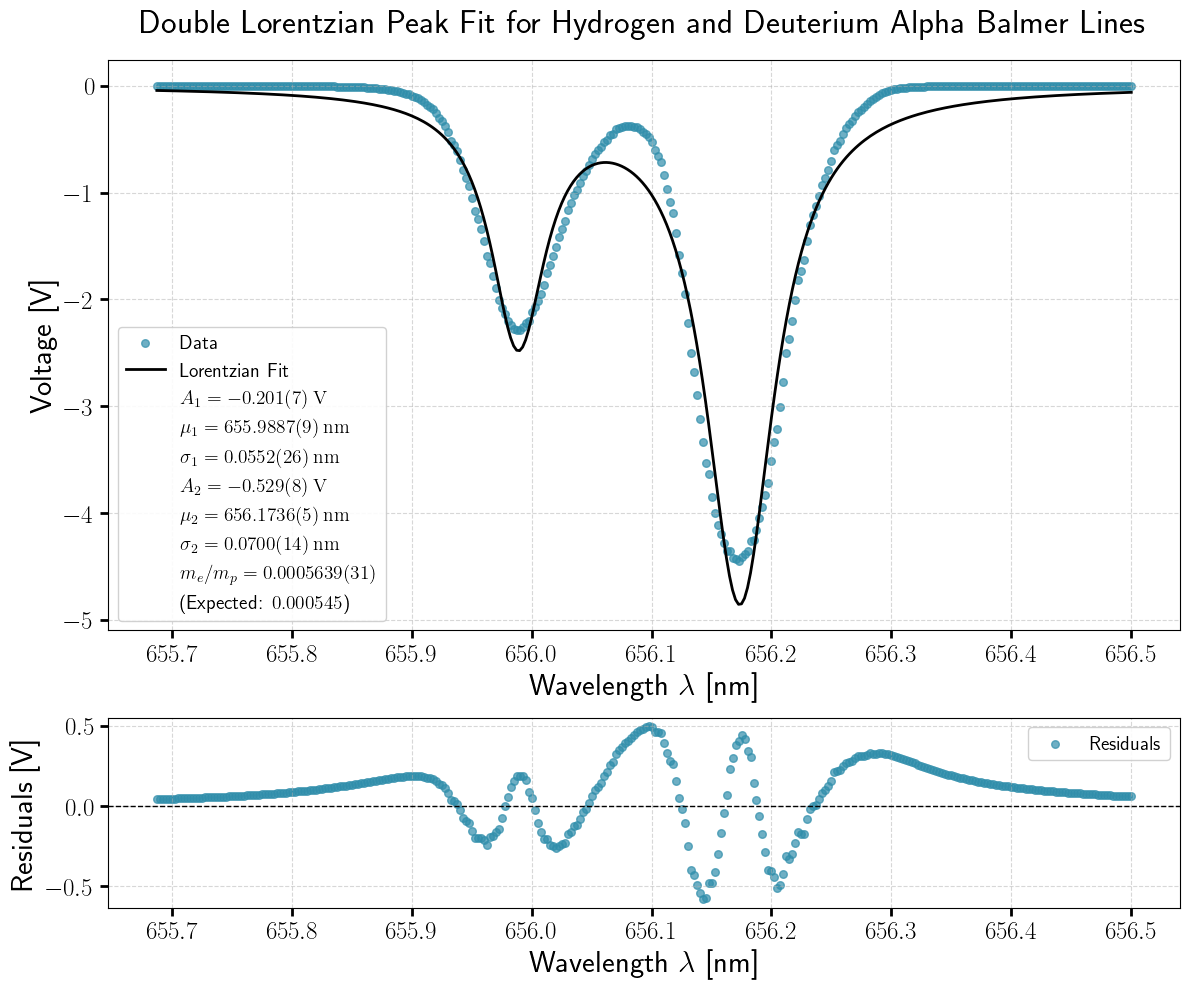

In [138]:
def double_lorentzian(x, A1, x1, G1, A2, x2, G2):
    """
    x: Wavelengths.
    A1: Amplitude of the first Lorentzian.
    G1: FWHM of the first Lorentzian.
    x1: Center of the first Lorentzian.
    A2: Amplitude of the second Lorentzian.
    G2: FWHM of the second Lorentzian.
    x2: Center of the second Lorentzian.
    """
    L1 = A1*(G1/2) / (np.pi * ((x - x1)**2 + (G1 / 2)**2))
    L2 = A2*(G2/2) / (np.pi * ((x - x2)**2 + (G2 / 2)**2))
    return L1 + L2

initial_guess_lorentzian = [-0.05, 655.9, 0.1, -0.05, 656.1, 0.1]
params, uncertainties, fitted_values, residuals, mass_ratio, param_with_uncertainties = fit_double_peak(
    wavelength_alpha, voltage_alpha, double_lorentzian, initial_guess_lorentzian
)

fig, ax1, ax2 = plot_double_peak_fit(
    wavelength_alpha, voltage_alpha, double_lorentzian,
    params, residuals, mass_ratio, param_with_uncertainties,
    title="Hydrogen and Deuterium Alpha Balmer Lines",
    fit_title="Lorentzian",
    color_idx=1, show_residuals=True
)
plt.show()

### Double Voigt
$$
V(x) = \frac{A_1}{\sigma_1 \sqrt{2\pi}} \operatorname{Re} \left( w \left( \frac{x - x_1 + iG_1}{\sigma_1 \sqrt{2}} \right) \right) + \frac{A_2}{\sigma_2 \sqrt{2\pi}} \operatorname{Re} \left( w \left( \frac{x - x_2 + iG_2}{\sigma_2 \sqrt{2}} \right) \right)
$$

Mass ratio old: 0.0005569+/-0.0000010
Mass ratio: 0.0005570+/-0.0000010


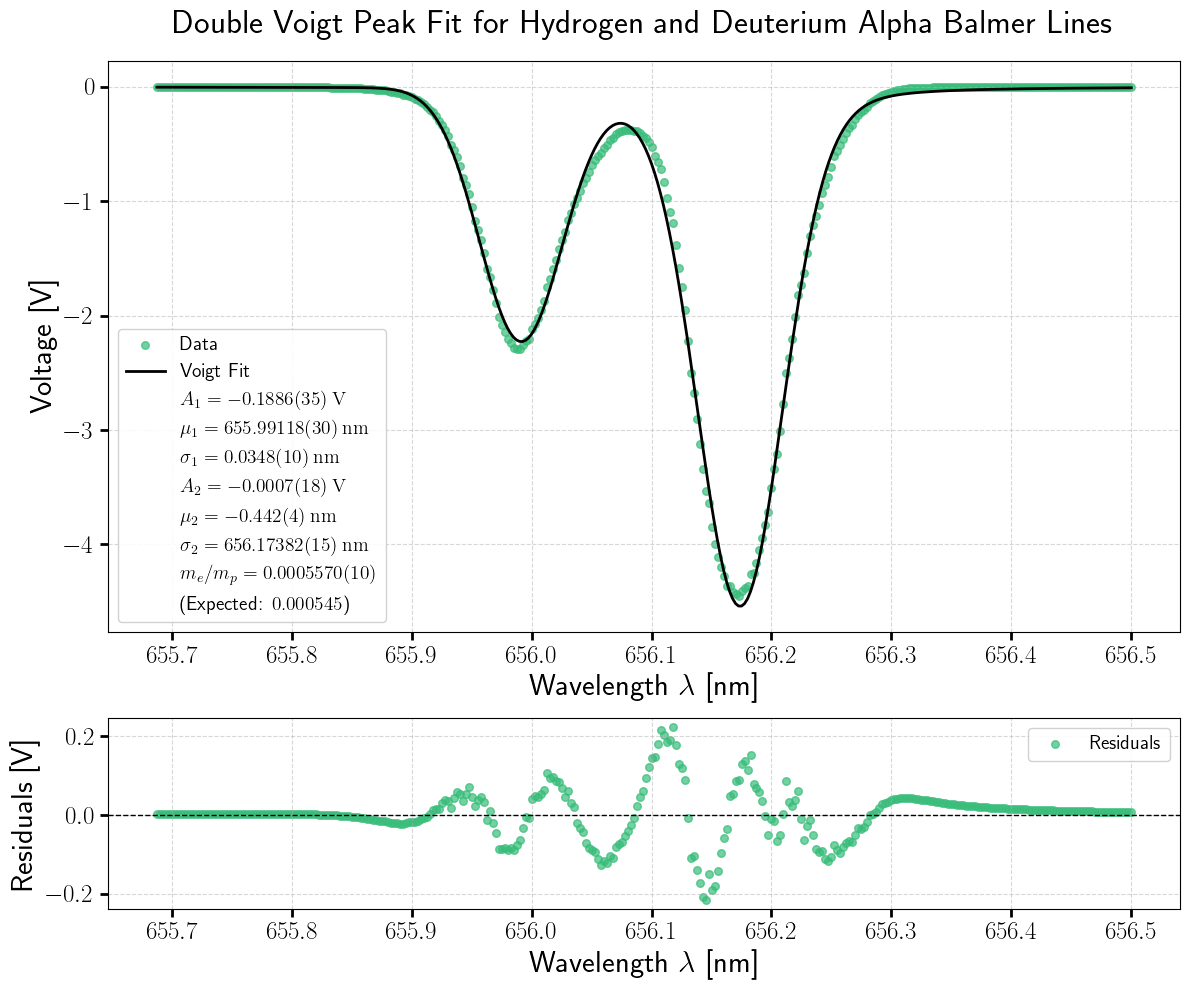

In [139]:
def double_voigt(x, A1, x1, sigma1, G1, A2, x2, sigma2, G2):
    """
    x Wavelengths.
    A: Amplitude of the peak.
    xi: Center of the peak.
    sigma: Standard deviation of the Gaussian component.
    Gi: Full-width at half-maximum of the Lorentzian component.
    """
    z1 = A1 * np.real(wofz((x - x1 + 1j*G1)/sigma1/np.sqrt(2))) / (sigma1*np.sqrt(2*np.pi))
    z2 = A2 * np.real(wofz((x - x2  + 1j*G2)/sigma2/np.sqrt(2))) / (sigma2*np.sqrt(2*np.pi))
    return z1 + z2

initial_guess_voigt = [-0.1, 655.9, 0.04, 0.04, -0.4, 656.2, 0.05, 0.05]
params, uncertainties, fitted_values, residuals, mass_ratio, param_with_uncertainties = fit_double_peak(
    wavelength_alpha, voltage_alpha, double_voigt, initial_guess_voigt, lambda1_idx=1, lambda2_idx=5
)

fig, ax1, ax2 = plot_double_peak_fit(
    wavelength_alpha, voltage_alpha, double_voigt,
    params, residuals, mass_ratio, param_with_uncertainties,
    title="Hydrogen and Deuterium Alpha Balmer Lines",
    fit_title="Voigt",
    color_idx=2, show_residuals=True
)
plt.show()